# The CBS algorithm for MAPF

In [4]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../')
from MAPF.metrics import flowtime, makespan
                
from MAPF import MultiAgentAStar,CBS
%load_ext autoreload
%autoreload 2

%matplotlib inline

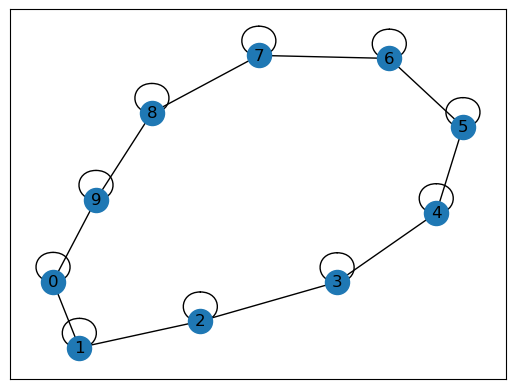

In [5]:
G = nx.circulant_graph(10,offsets = [0,1])
nx.draw_networkx(G)

In [12]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([0,1]) # Must be hashable.

goal_nodes = tuple([3,9]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 

print('Multi-agent A*', MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals))

print('CBS',CBS(G,start_nodes,goal_nodes))

Multi-agent A* (array([[0, 1, 2, 3],
       [1, 5, 9, 9]]), 5)
CBS ([[0, 1, 2, 3], [1, 5, 9]], 5)


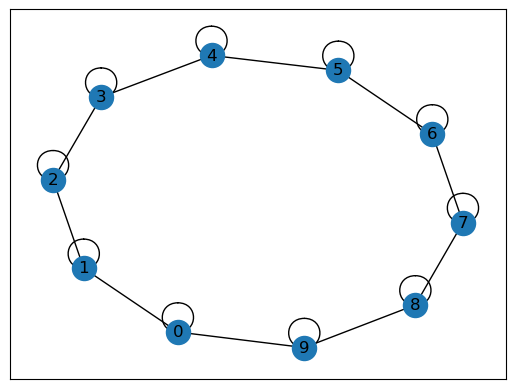

In [13]:
G = nx.circulant_graph(10,offsets = [0,1])
nx.draw_networkx(G)

In [14]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([0,1,2]) # Must be hashable.

goal_nodes = tuple([3,6,9]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 


print('Multi-agent A*', MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals))

print('CBS',CBS(G,start_nodes,goal_nodes))

Multi-agent A* (array([[0, 0, 1, 2, 3, 3],
       [1, 2, 3, 4, 5, 6],
       [2, 1, 0, 9, 9, 9]]), 12)
CBS ([[0, 1, 2, 3], [1, 0, 9, 8, 7, 6], [2, 2, 1, 0, 9]], 12)


In [16]:
from time import time

n_nodes = 9

ldim = int(np.ceil(np.sqrt(n_nodes)))
udim = int(np.floor(np.sqrt(n_nodes)))
G = nx.grid_graph([ldim,udim])
G = nx.convert_node_labels_to_integers(G)

for i in range(len(G)):
    G.add_edge(i,i)
    
n_nodes = G.number_of_nodes()

n_agents = 4

start_nodes = (6, 4, 3, 0)  # Must be hashable.

goal_nodes = (5, 7, 6, 4) 

labeled_goals = True 

t = time()
result = MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)
if result:
    MAAS_sol,MAAS_ft = result

MAAS_time = time()-t

# print('Multi-agent A*', result, 'time', MAAS_time)

t = time()
result = CBS(G,start_nodes,goal_nodes)
if result:
    CBS_sol,CBS_ft = result

CBS_time = time()-t

if _:
    print('CBS Flowtime == MAAS Flowtime?',CBS_ft == MAAS_ft)
    if CBS_ft!=MAAS_ft:
        print(CBS_ft,CBS_sol,MAAS_ft,MAAS_sol)
        print(start_nodes,goal_nodes)

        nx.draw_networkx(G)
        plt.show()



CBS Flowtime == MAAS Flowtime? True


CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? True
CBS Flowtime == MAAS Flowtime? False
11 [[8, 4, 0, 1, 2, 3], [1, 2, 2, 2, 1, 2], [9, 5, 6, 7]] 10 [[8 4 0 1 2 3]
 [1 2 2 2 1 2]
 [9 5 6 7 7 7]]
(8, 1, 9) (3, 2, 7)


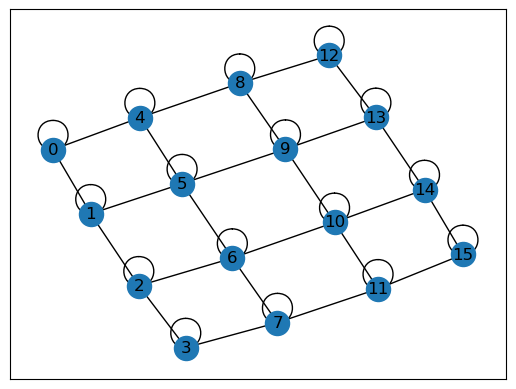

In [17]:
from time import time

n_nodes = 16

ldim = int(np.ceil(np.sqrt(n_nodes)))
udim = int(np.floor(np.sqrt(n_nodes)))
G = nx.grid_graph([ldim,udim])
G = nx.convert_node_labels_to_integers(G)

for i in range(len(G)):
    G.add_edge(i,i)
    
n_nodes = G.number_of_nodes()

n_agents = 3

np.random.seed(232)

for _ in range(200):

    start_nodes = tuple(np.random.choice(range(n_nodes),n_agents,replace=False)) # Must be hashable.

    goal_nodes = tuple(np.random.choice(range(n_nodes),n_agents,replace=False)) 

    labeled_goals = True 

    t = time()
    result = MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)
    if result:
        MAAS_sol,MAAS_ft = result
    else:
        continue
    MAAS_time = time()-t

    # print('Multi-agent A*', result, 'time', MAAS_time)

    t = time()
    result = CBS(G,start_nodes,goal_nodes)
    if result:
        CBS_sol,CBS_ft = result
    else:
        continue
    CBS_time = time()-t
    
    if _:
        print('CBS Flowtime == MAAS Flowtime?',CBS_ft == MAAS_ft)
        if CBS_ft!=MAAS_ft:
            print(CBS_ft,CBS_sol,MAAS_ft,MAAS_sol)
            print(start_nodes,goal_nodes)
            
            nx.draw_networkx(G)
            plt.show()
            break
